In [1]:
import os
import joblib
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels import robust

In [2]:
from GraphicSetting import *
import HelloDataScience as hds

In [5]:
np.random.seed(seed = 1234)
np.random.choice(a = range(1, 46), size = 6, replace = False)

array([40, 35, 45, 26,  9, 15])

In [6]:
np.random.seed(seed = 1234)
np.random.choice(a = range(1, 46), size = 6, replace = False)

array([40, 35, 45, 26,  9, 15])

In [9]:
for i in range(10):
    lotto = np.random.choice(a = range(1, 46), size = 6, replace = False)
    lotto.sort()
    print(lotto)

[ 6 11 15 16 21 28]
[12 13 15 24 34 38]
[ 3 13 14 33 35 38]
[ 1  4  7 20 21 37]
[ 2 10 23 24 25 43]
[13 19 22 25 39 43]
[15 16 19 36 42 44]
[ 3 25 31 32 42 44]
[22 31 34 39 43 44]
[ 3  8 12 14 25 36]


In [10]:
np.random.seed(seed = 1234)

In [11]:
heights = stats.norm.rvs(loc = 175, scale = 5, size = 5000)

In [12]:
heights.mean()

175.12138663450918

In [13]:
heights.std()

4.9588737381446055

In [14]:
h2 = stats.norm.rvs(loc = 175, scale = 5, size = 50000)

In [15]:
h2.mean()

174.99687649633296

In [16]:
h2.std()

4.9973187848258815

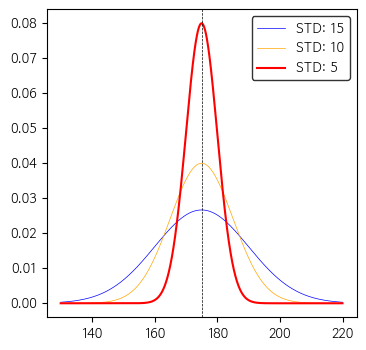

In [21]:
x = np.arange(130, 220.1, 0.1)
y1 = stats.norm.pdf(x = x, loc = 175, scale = 15)
y2 = stats.norm.pdf(x = x, loc = 175, scale = 10)
y3 = stats.norm.pdf(x = x, loc = 175, scale = 5)

sns.lineplot(x = x, y = y1, color = 'blue', label = 'STD: 15')
sns.lineplot(x = x, y = y2, color = 'orange', label = 'STD: 10')
sns.lineplot(x = x, y = y3, color = 'red', label = 'STD: 5', lw = 1.5)
plt.axvline(x = 175, color = 'black', ls = '--');

In [26]:
stats.norm.pdf(x = x, loc = 175, scale = 5)

array([2.05595471e-19, 2.46093245e-19, 2.94450382e-19, 3.52168765e-19,
       4.21032702e-19, 5.03161155e-19, 6.01069463e-19, 7.17742240e-19,
       8.56719454e-19, 1.02219802e-18, 1.21915163e-18, 1.45347207e-18,
       1.73213583e-18, 2.06340025e-18, 2.45703473e-18, 2.92459272e-18,
       3.47973182e-18, 4.13859032e-18, 4.92022976e-18, 5.84715506e-18,
       6.94592550e-18, 8.24787200e-18, 9.78993903e-18, 1.16156721e-17,
       1.37763758e-17, 1.63324713e-17, 1.93550860e-17, 2.29279165e-17,
       2.71494076e-17, 3.21353037e-17, 3.80216308e-17, 4.49681845e-17,
       5.31626046e-17, 6.28251347e-17, 7.42141793e-17, 8.76327887e-17,
       1.03436224e-16, 1.22040777e-16, 1.43934053e-16, 1.69686943e-16,
       1.99967575e-16, 2.35557543e-16, 2.77370797e-16, 3.26475605e-16,
       3.84120086e-16, 4.51761881e-16, 5.31102603e-16, 6.24127846e-16,
       7.33153599e-16, 8.60880092e-16, 1.01045422e-15, 1.18554188e-15,
       1.39041178e-15, 1.63003249e-15, 1.91018472e-15, 2.23759124e-15,
      

In [17]:
stats.norm.pdf(x = 175, loc = 175, scale = 15)

0.02659615202676218

In [18]:
stats.norm.pdf(x = 175, loc = 175, scale = 10)

0.03989422804014327

In [19]:
stats.norm.pdf(x = 175, loc = 175, scale = 5)

0.07978845608028654

In [22]:
stats.norm.cdf(x = 185, loc = 175, scale = 15)

0.7475074624530771

In [23]:
stats.norm.cdf(x = 185, loc = 175, scale = 10)

0.8413447460685429

In [24]:
stats.norm.cdf(x = 185, loc = 175, scale = 5)

0.9772498680518208

In [28]:
cdfs = stats.norm.cdf(x = [185, 188], loc = 175, scale = 5)

In [29]:
np.diff(cdfs)

array([0.01808894])

In [31]:
stats.norm.ppf(q = 0.7475074624530771, loc = 175, scale = 15)

185.0

In [32]:
stats.norm.ppf(q = 0.8413447460685429, loc = 175, scale = 10)

185.0

In [33]:
stats.norm.ppf(q = 0.9772498680518208, loc = 175, scale = 5)

185.0

In [34]:
stats.norm.ppf(q = 0.95, loc = 175, scale = 5)

183.22426813475735

In [35]:
stats.norm.ppf(q = 0.99, loc = 164, scale = 5)

175.6317393702042

In [36]:
stats.skew(heights)

-0.03668062034777025

In [37]:
stats.kurtosis(heights)

-0.07067499523641407

In [38]:
stats.shapiro(heights)

ShapiroResult(statistic=0.9995919466018677, pvalue=0.396047443151474)

In [39]:
np.random.seed(seed = 1234)

In [40]:
heights = stats.norm.rvs(loc = 175, scale = 5, size = 10000)

In [41]:
stats.shapiro(heights)

C:\Users\hdsce\ve310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9996193051338196, pvalue=0.04346244037151337)

In [42]:
stats.anderson(heights)

AndersonResult(statistic=0.35265258232357155, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=175.08063230023598, scale=4.9761483416071846)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [43]:
def scale(x, loc, scale):
    return (x - loc) / scale

In [44]:
scale(x = 90, loc = 75, scale = 15)

1.0

In [45]:
scale(x = 55, loc = 40, scale = 10)

1.5

In [47]:
scaled = scale(x = heights, loc = 175, scale = 5)
scaled

array([ 0.47143516, -1.19097569,  1.43270697, ..., -1.05246069,
       -0.4976931 , -0.2560062 ])

In [50]:
np.abs(scaled)

array([0.47143516, 1.19097569, 1.43270697, ..., 1.05246069, 0.4976931 ,
       0.2560062 ])

In [51]:
np.abs(scaled) > 3

array([False, False, False, ..., False, False, False])

In [52]:
np.where(np.abs(scaled) > 3, '이상치', '정상치')

array(['정상치', '정상치', '정상치', ..., '정상치', '정상치', '정상치'], dtype='<U3')

In [54]:
locs = np.where(np.abs(scaled) > 3)

In [55]:
heights[locs]

array([157.1824167 , 190.62817574, 190.54817675, 155.59550794,
       158.61347962, 191.10284213, 158.83247735, 157.82590423,
       159.91806595, 159.24619206, 190.00573485, 158.67898086,
       157.0030016 , 158.68108413, 159.25844267, 191.43893949,
       158.34281695, 155.70665632, 190.18821417, 159.73908333])

In [56]:
heights = pd.Series(data = heights)

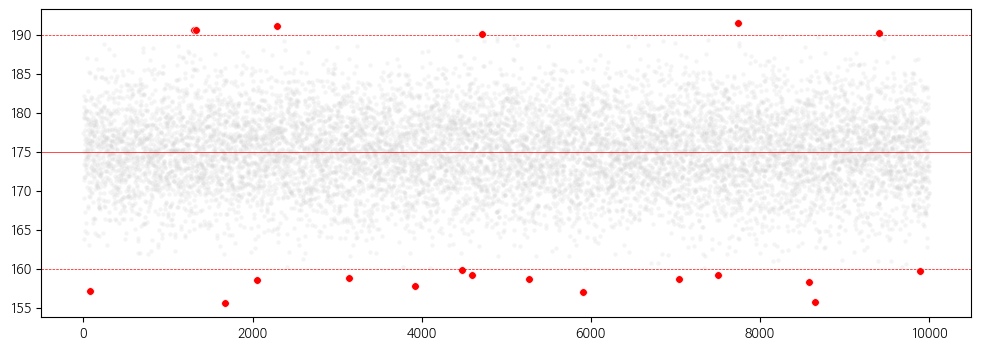

In [63]:
plt.figure(figsize = (12, 4))
sns.scatterplot(x = heights.index, y = heights, 
                color = '0.8', s = 10, alpha = 0.2)
sns.scatterplot(x = heights.loc[locs].index, y = heights.loc[locs], 
                color = 'red', s = 30, alpha = 1)
plt.axhline(y = 175, color = 'red', ls = '-')
plt.axhline(y = 190, color = 'red', ls = '--')
plt.axhline(y = 160, color = 'red', ls = '--');

In [64]:
import os
import joblib
import numpy as np
import pandas as pd

from scipy import stats
import pingouin as pg
import scikit_posthocs as sp
from statsmodels.stats.proportion import proportions_ztest

In [65]:
os.getcwd()

'C:\\Users\\hdsce\\Documents\\PythonAdvanced-main\\live'

In [66]:
os.chdir(path = '../data')

In [67]:
os.listdir()

['Seafood_Trade_Prep.z',
 'Used_Cars_Price.csv',
 'Used_Cars_Price.xlsx',
 'Used_Cars_Price.z']

In [68]:
df = joblib.load(filename = 'Used_Cars_Price.z')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1268 non-null   int64 
 1   Age        1268 non-null   int64 
 2   KM         1268 non-null   int64 
 3   FuelType   1268 non-null   object
 4   HP         1268 non-null   int64 
 5   MetColor   1268 non-null   object
 6   Automatic  1268 non-null   object
 7   CC         1268 non-null   int64 
 8   Doors      1268 non-null   int64 
 9   Weight     1268 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 99.2+ KB


In [70]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [71]:
df['Age'].cov(df['Price'])

-22157.692905818418

In [74]:
df.cov(numeric_only = True).round(2)

,Price,Age,KM,HP,CC,Doors,Weight
Price,4117236.37,-22157.69,-3.744107e+07,5899.69,18808.75,317.01,15155.22
Age,-22157.69,187.94,1.711871e+05,-7.99,-213.61,-1.18,-98.23
KM,-37441074.77,171187.12,1.285820e+09,-155996.12,2557934.81,595.87,359258.46
HP,5899.69,-7.99,-1.559961e+05,171.61,-46.69,1.50,-39.09
CC,18808.75,-213.61,2.557935e+06,-46.69,33730.00,23.85,5001.29
Doors,317.01,-1.18,5.958700e+02,1.50,23.85,0.90,13.21
Weight,15155.22,-98.23,3.592585e+05,-39.09,5001.29,13.21,1145.08


In [76]:
df['Age'].corr(df['Price'])

-0.7965447290519272

In [77]:
df.corr(numeric_only = True).round(2)

,Price,Age,KM,HP,CC,Doors,Weight
Price,1.00,-0.80,-0.51,0.22,0.05,0.16,0.22
Age,-0.80,1.00,0.35,-0.04,-0.08,-0.09,-0.21
KM,-0.51,0.35,1.00,-0.33,0.39,0.02,0.30
HP,0.22,-0.04,-0.33,1.00,-0.02,0.12,-0.09
CC,0.05,-0.08,0.39,-0.02,1.00,0.14,0.80
Doors,0.16,-0.09,0.02,0.12,0.14,1.00,0.41
Weight,0.22,-0.21,0.30,-0.09,0.80,0.41,1.00


In [78]:
df.corr(numeric_only = True, method = 'spearman').round(2)

,Price,Age,KM,HP,CC,Doors,Weight
Price,1.00,-0.78,-0.52,0.20,0.08,0.17,0.24
Age,-0.78,1.00,0.40,-0.03,-0.08,-0.09,-0.18
KM,-0.52,0.40,1.00,-0.17,0.25,0.02,0.16
HP,0.20,-0.03,-0.17,1.00,0.34,0.15,0.16
CC,0.08,-0.08,0.25,0.34,1.00,0.17,0.74
Doors,0.17,-0.09,0.02,0.15,0.17,1.00,0.49
Weight,0.24,-0.18,0.16,0.16,0.74,0.49,1.00


In [96]:
df.corr(numeric_only = True, method = 'spearman').round(2)['Price']

Price     1.00
Age      -0.78
KM       -0.52
HP        0.20
CC        0.08
Doors     0.17
Weight    0.24
Name: Price, dtype: float64

In [79]:
pg.corr(x = df['Age'], y = df['Price'])

,n,r,CI95%,p-val,BF10,power
pearson,1268,-0.796545,"[-0.82, -0.78]",5.879611e-279,6.169e+274,1.0


In [80]:
x = df['Age']

In [82]:
pg.corr(x = x, y = df['Price'])['p-val']

pearson    5.879611e-279
Name: p-val, dtype: float64

In [83]:
corr = lambda x: pg.corr(x = x, y = df['Price'])['p-val']

In [84]:
corr(x = df['Age'])

pearson    5.879611e-279
Name: p-val, dtype: float64

In [85]:
df.shape

(1268, 10)

In [86]:
df.apply(func = len, axis = 0)

Price        1268
Age          1268
KM           1268
FuelType     1268
HP           1268
MetColor     1268
Automatic    1268
CC           1268
Doors        1268
Weight       1268
dtype: int64

In [87]:
df.apply(func = len, axis = 1)

0       10
1       10
2       10
3       10
4       10
        ..
1263    10
1264    10
1265    10
1266    10
1267    10
Length: 1268, dtype: int64

In [91]:
locs = df.dtypes == np.int64

In [93]:
# df.apply(func = lambda x: pg.corr(x = x, y = df['Price'])['p-val'], axis = 0)
df.loc[:, locs].apply(func = corr, axis = 0)

,Price,Age,KM,HP,CC,Doors,Weight
pearson,0.0,5.879611e-279,1.187373e-86,1.289468e-15,0.072396,3.644964e-09,1.863429e-15


In [94]:
df.loc[:, locs].apply(func = corr, axis = 0).ge(0.05)

,Price,Age,KM,HP,CC,Doors,Weight
pearson,False,False,False,False,True,False,False


In [95]:
df.loc[:, locs].apply(func = lambda x: pg.corr(x = x, y = df['Price'])['r'])

,Price,Age,KM,HP,CC,Doors,Weight
pearson,1.0,-0.796545,-0.514583,0.221951,0.050472,0.164706,0.22072


In [97]:
pg.normality(data = df, dv = 'Price', group = 'MetColor')

,W,pval,normal
MetColor,,,
1,0.974759,7.077313e-11,False
0,0.988073,1.429560e-03,False


In [98]:
pg.homoscedasticity(data = df, dv = 'Price', group = 'MetColor')

,W,pval,equal_var
levene,5.761315,0.016526,False


In [99]:
sp1 = df['Price'][df['MetColor'].eq('0')]
sp2 = df['Price'][df['MetColor'].eq('1')]

In [104]:
print(sp1.mean())
print(sp2.mean())

9466.672897196262
9814.132142857143


In [105]:
print(sp1.std())
print(sp2.std())

1894.0820249158035
2085.8869846927896


In [100]:
pg.ttest(x = sp1, y = sp2, correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.891752,1266,two-sided,0.003896,"[-583.18, -111.73]",0.171735,4.077,0.82371


In [101]:
pg.ttest(x = sp1, y = sp2, correction = True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.983633,935.893141,two-sided,0.002922,"[-576.0, -118.92]",0.171735,5.313,0.82371


In [102]:
pg.mwu(x = sp1, y = sp2)

,U-val,alternative,p-val,RBC,CLES
MWU,166376.0,two-sided,0.029849,0.074455,0.462773


In [107]:
df1 = pd.read_csv('https://bit.ly/ttest_dataset')

In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      30 non-null     int64  
 1   before  30 non-null     float64
 2   after   30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [109]:
df1.head()

,id,before,after
0,1,88.409617,89.047771
1,2,84.740057,83.796276
2,3,106.925242,105.782969
3,4,93.276659,89.965632
4,5,104.575636,103.410691


In [110]:
df1.describe()

,id,before,after
count,30.000000,30.000000,30.000000
mean,15.500000,86.331409,85.325118
std,8.803408,9.918105,9.779472
min,1.000000,67.503561,65.462936
25%,8.250000,80.123625,79.998144
50%,15.500000,86.617928,86.149042
75%,22.750000,91.690221,90.259867
max,30.000000,106.925242,105.782969


In [111]:
stats.shapiro(df1['before'])

ShapiroResult(statistic=0.9858832359313965, pvalue=0.9512473940849304)

In [112]:
stats.shapiro(df1['before'])[1]

0.9512473940849304

In [113]:
pg.ttest(x = df1['before'], y = 90)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.025961,29,two-sided,0.052056,"[82.63, 90.03]",0.369888,1.159,0.499536


In [114]:
pg.ttest(x = df1['before'], y = 90, alternative = 'less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.025961,29,less,0.026028,"[-inf, 89.41]",0.369888,2.318,0.63062


In [115]:
df1.apply(func = lambda x: stats.shapiro(x)[1])

id        0.266230
before    0.951247
after     0.939600
dtype: float64

In [116]:
pg.ttest(x = df1['before'], y = df1['after'], paired = True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.53666,29,two-sided,0.000006,"[0.63, 1.38]",0.102172,3529.131,0.084186


In [117]:
pg.ttest(x = df1['before'], y = df1['after'], paired = True, alternative = 'greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.53666,29,greater,0.000003,"[0.7, inf]",0.102172,7058.261,0.136056


In [118]:
pg.normality(data = df, dv = 'Price', group = 'FuelType')

,W,pval,normal
FuelType,,,
Diesel,0.955971,4.250351e-04,False
Petrol,0.978165,5.503549e-12,False
CNG,0.952408,4.957061e-01,True


In [119]:
pg.homoscedasticity(data = df, dv = 'Price', group = 'FuelType')

,W,pval,equal_var
levene,6.497893,0.001557,False


In [120]:
pg.anova(data = df, dv = 'Price', between = 'FuelType')

,Source,ddof1,ddof2,F,p-unc,np2
0,FuelType,2,1265,3.982748,0.018869,0.006257


In [121]:
pg.welch_anova(data = df, dv = 'Price', between = 'FuelType')

,Source,ddof1,ddof2,F,p-unc,np2
0,FuelType,2,38.941548,2.611953,0.086207,0.006257


In [122]:
df['FuelType'].value_counts()

Petrol    1125
Diesel     126
CNG         17
Name: FuelType, dtype: int64

In [123]:
pg.kruskal(data = df, dv = 'Price', between = 'FuelType')

,Source,ddof1,H,p-unc
Kruskal,FuelType,2,10.47472,0.005314


In [124]:
sp.posthoc_scheffe(a = df, val_col = 'Price', group_col = 'FuelType')

,Diesel,Petrol,CNG
Diesel,1.000000,0.022116,0.933882
Petrol,0.022116,1.000000,0.797953
CNG,0.933882,0.797953,1.000000


In [125]:
sp.posthoc_tukey(a = df, val_col = 'Price', group_col = 'FuelType')

,Diesel,Petrol,CNG
Diesel,1.000000,0.015915,0.900000
Petrol,0.015915,1.000000,0.759308
CNG,0.900000,0.759308,1.000000


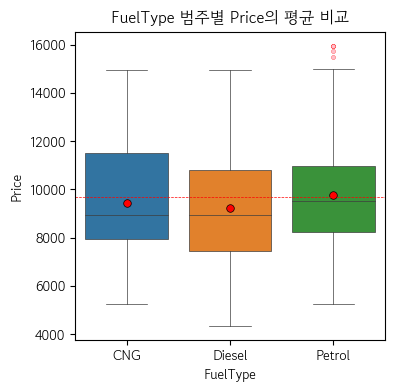

In [126]:
hds.plot_box_group(data = df, x = 'FuelType', y = 'Price')

In [127]:
# Automatic과 Price로 독립표본 t-검정을 순차적으로 실행해보세요.
pg.normality(data = df, dv = 'Price', group = 'Automatic')

,W,pval,normal
Automatic,,,
0,0.981458,2.977123e-11,False
1,0.948419,5.997743e-03,False


In [128]:
pg.homoscedasticity(data = df, dv = 'Price', group = 'Automatic')

,W,pval,equal_var
levene,1.092962,0.296015,True


In [129]:
sp1 = df['Price'][df['Automatic'].eq('0')]
sp2 = df['Price'][df['Automatic'].eq('1')]

In [130]:
pg.ttest(x = sp1, y = sp2, correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.472702,1266,two-sided,0.14108,"[-856.55, 121.99]",0.181091,0.377,0.312941


In [131]:
df['Automatic'].value_counts()

0    1198
1      70
Name: Automatic, dtype: int64

In [134]:
pd.pivot_table(
    data = df, 
    values = 'Price', 
    index = 'MetColor', 
    columns = 'Automatic', 
    aggfunc = np.size
)

Automatic,0,1
MetColor,,
0,402,26
1,796,44


In [138]:
pd.crosstab(
    index = df['MetColor'], 
    columns = df['Automatic'], 
    margins = True, 
    margins_name = '합계', 
    normalize = 'index'
)

Automatic,0,1
MetColor,,
0,0.939252,0.060748
1,0.947619,0.052381
합계,0.944795,0.055205


In [139]:
test = pg.chi2_independence(data = df, x = 'MetColor', y = 'Automatic', correction = True)

In [140]:
test

(Automatic          0         1
 MetColor                      
 0          404.37224  23.62776
 1          793.62776  46.37224,
 Automatic      0     1
 MetColor              
 0          402.5  25.5
 1          795.5  44.5,
                  test    lambda      chi2  dof      pval    cramer     power
 0             pearson  1.000000  0.237030  1.0  0.626360  0.013672  0.077567
 1        cressie-read  0.666667  0.236104  1.0  0.627034  0.013646  0.077458
 2      log-likelihood  0.000000  0.234308  1.0  0.628348  0.013594  0.077246
 3       freeman-tukey -0.500000  0.233008  1.0  0.629302  0.013556  0.077093
 4  mod-log-likelihood -1.000000  0.231749  1.0  0.630230  0.013519  0.076945
 5              neyman -2.000000  0.229348  1.0  0.632008  0.013449  0.076662)

In [141]:
df = df.drop(columns = ['CC', 'Automatic'])

In [142]:
df = df[df['FuelType'].ne('CNG')]

In [143]:
df = df.reset_index(drop = True)

In [144]:
joblib.dump(value = df, filename = 'Used_Cars_Price_Prep.z')

['Used_Cars_Price_Prep.z']